In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

sys.path.append('../')

from plot import backtest_plot

/home/neeraj/anaconda3/envs/ddpg_trading/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import empyrical as ep

In [4]:
%matplotlib inline

In [ ]:
# wandb run name: true_sun_32

In [4]:
results_dir = '../results_lr_schedule_grad_clip_critic_n_actor_2016_2020_may/'

In [5]:
os.listdir(results_dir)

['return_comparison_episode_0.csv',
 'return_comparison_episode_40.csv',
 'daily_actions_test_episode_40.csv',
 'return_comparison_episode_20.csv',
 'daily_actions_test_episode_30.csv',
 'account_value_test_episode_10.csv',
 'daily_actions_test_episode_20.csv',
 'return_comparison_episode_30.csv',
 'daily_actions_test_episode_10.csv',
 'account_value_test_episode_30.csv',
 'account_value_test_episode_20.csv',
 'daily_actions_test_episode_0.csv',
 'return_comparison_episode_10.csv',
 'account_value_test_episode_0.csv',
 'account_value_test_episode_40.csv']

In [6]:
ac_value_agent = 'account_value_test_episode_30.csv'

In [7]:
df_account_value = pd.read_csv(os.path.join(results_dir, ac_value_agent), index_col='Unnamed: 0')
df_account_value

date  account_value
0     2016-01-04   1.000000e+06
1     2016-01-05   9.999329e+05
2     2016-01-06   9.978216e+05
3     2016-01-07   9.932495e+05
4     2016-01-08   9.901278e+05
...          ...            ...
1088  2020-04-30   1.599590e+06
1089  2020-05-01   1.563307e+06
1090  2020-05-04   1.564141e+06
1091  2020-05-05   1.573794e+06
1092  2020-05-06   1.561508e+06

[1093 rows x 2 columns]

In [8]:
df_account_value.loc[0,'date']

'2016-01-04'

In [9]:
df_account_value.loc[len(df_account_value)-1,'date']

'2020-05-06'

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


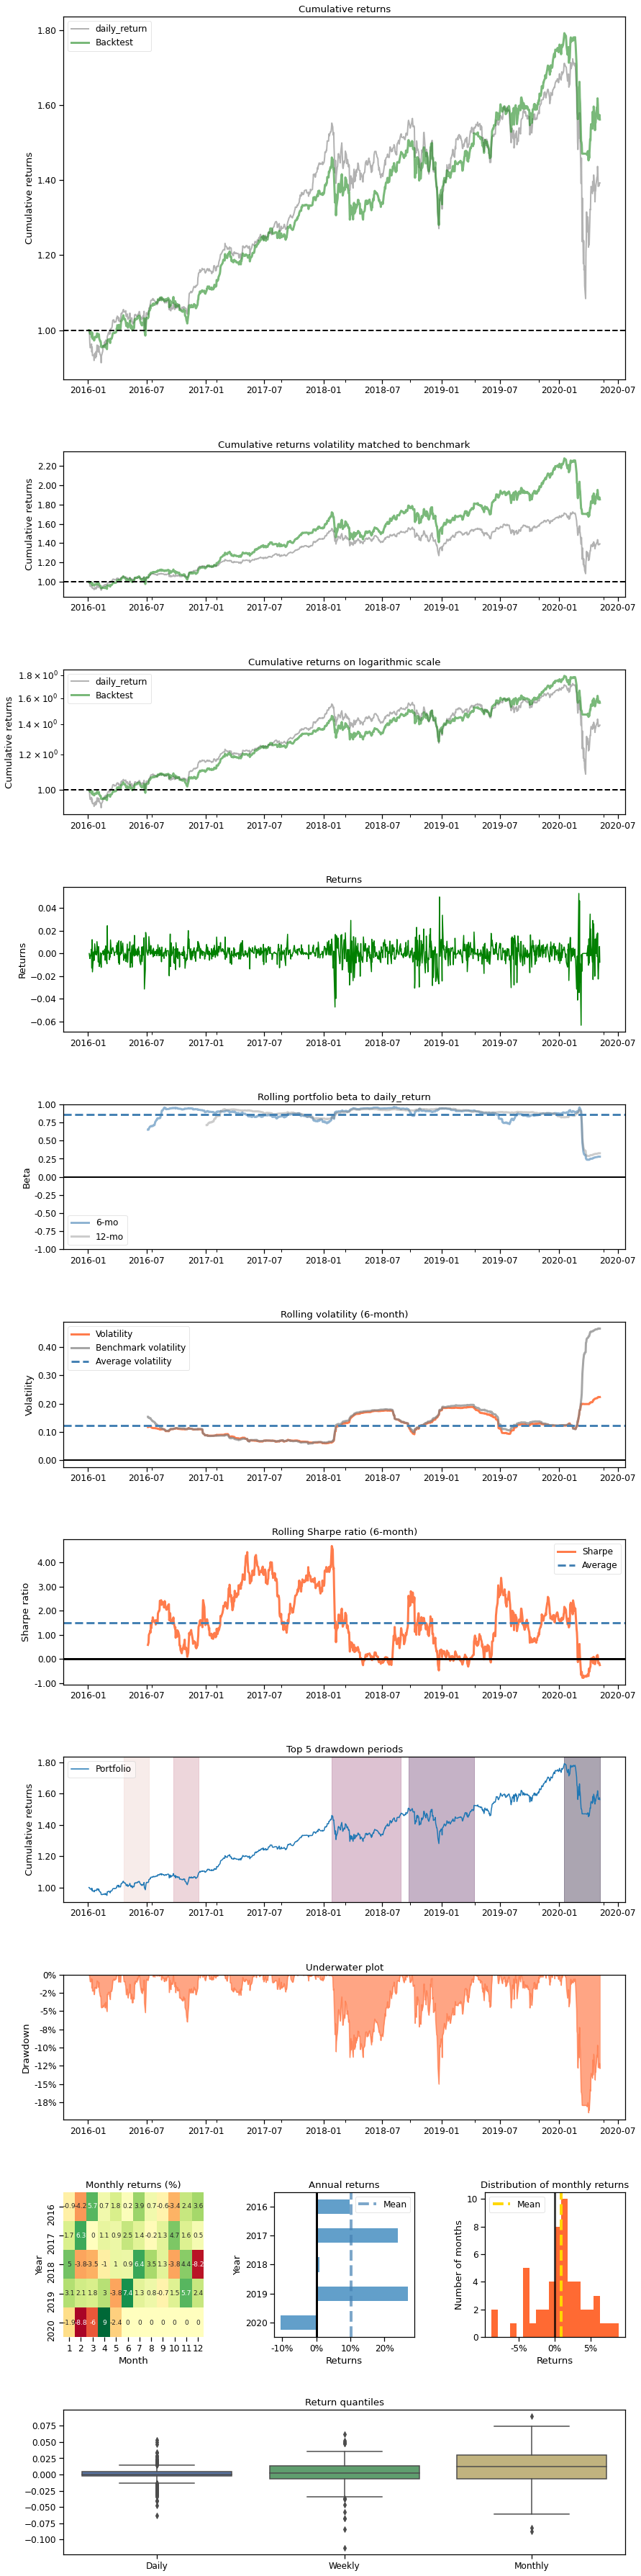

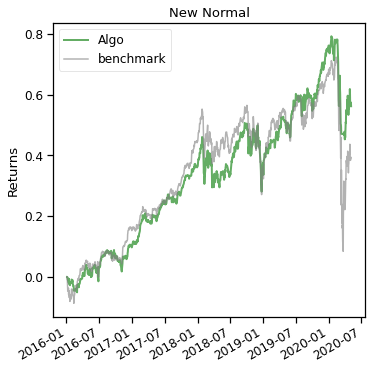

In [10]:
test_returns, baseline_returns = backtest_plot(df_account_value, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value.loc[0,'date'],
                                                 baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

In [11]:
def process_df(daily_returns_series):
    returns_df = pd.DataFrame(daily_returns_series) # index will be date here
    returns_df.reset_index(inplace=True)
    returns_df = returns_df.rename(columns = {'index':'date'})
    returns_df['date'] = [str(i).split()[0] for i in returns_df['date']]
    returns_df['date'] = pd.to_datetime(returns_df['date'], format='%Y-%m-%d')
    
    return returns_df

In [12]:
agent_returns = process_df(test_returns)
dji_returns = process_df(baseline_returns)

In [14]:
agent_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1093 non-null   datetime64[ns]
 1   daily_return  1092 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [15]:
dji_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1093 non-null   datetime64[ns]
 1   daily_return  1092 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [16]:
agent_returns

date  daily_return
0    2016-01-04           NaN
1    2016-01-05     -0.000067
2    2016-01-06     -0.002111
3    2016-01-07     -0.004582
4    2016-01-08     -0.003143
...         ...           ...
1088 2020-04-30     -0.011383
1089 2020-05-01     -0.022682
1090 2020-05-04      0.000533
1091 2020-05-05      0.006172
1092 2020-05-06     -0.007807

[1093 rows x 2 columns]

In [17]:
dji_returns

date  daily_return
0    2016-01-04           NaN
1    2016-01-05      0.000567
2    2016-01-06     -0.014695
3    2016-01-07     -0.023211
4    2016-01-08     -0.010152
...         ...           ...
1088 2020-04-30     -0.011697
1089 2020-05-01     -0.025550
1090 2020-05-04      0.001099
1091 2020-05-05      0.005614
1092 2020-05-06      0.000000

[1093 rows x 2 columns]

In [20]:
sample = pd.DataFrame(test_returns)

In [21]:
sample

daily_return
date                                   
2016-01-04 00:00:00+00:00           NaN
2016-01-05 00:00:00+00:00     -0.000067
2016-01-06 00:00:00+00:00     -0.002111
2016-01-07 00:00:00+00:00     -0.004582
2016-01-08 00:00:00+00:00     -0.003143
...                                 ...
2020-04-30 00:00:00+00:00     -0.011383
2020-05-01 00:00:00+00:00     -0.022682
2020-05-04 00:00:00+00:00      0.000533
2020-05-05 00:00:00+00:00      0.006172
2020-05-06 00:00:00+00:00     -0.007807

[1093 rows x 1 columns]

<AxesSubplot:xlabel='date'>

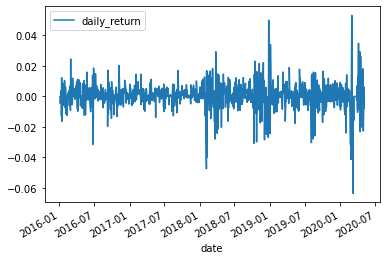

In [28]:
cum_rets = ep.cum_returns(test_returns, 0.0)
cum_rets_dji = ep.cum_returns(baseline_returns, 0.0)

In [29]:
cum_rets

date
2016-01-04 00:00:00+00:00    0.000000
2016-01-05 00:00:00+00:00   -0.000067
2016-01-06 00:00:00+00:00   -0.002178
2016-01-07 00:00:00+00:00   -0.006750
2016-01-08 00:00:00+00:00   -0.009872
                               ...   
2020-04-30 00:00:00+00:00    0.599590
2020-05-01 00:00:00+00:00    0.563307
2020-05-04 00:00:00+00:00    0.564141
2020-05-05 00:00:00+00:00    0.573794
2020-05-06 00:00:00+00:00    0.561508
Length: 1093, dtype: float64

In [30]:
cum_rets_dji

date
2016-01-04 00:00:00+00:00    0.000000
2016-01-05 00:00:00+00:00    0.000567
2016-01-06 00:00:00+00:00   -0.014137
2016-01-07 00:00:00+00:00   -0.037019
2016-01-08 00:00:00+00:00   -0.046795
                               ...   
2020-04-30 00:00:00+00:00    0.419663
2020-05-01 00:00:00+00:00    0.383391
2020-05-04 00:00:00+00:00    0.384911
2020-05-05 00:00:00+00:00    0.392686
2020-05-06 00:00:00+00:00    0.392686
Length: 1093, dtype: float64

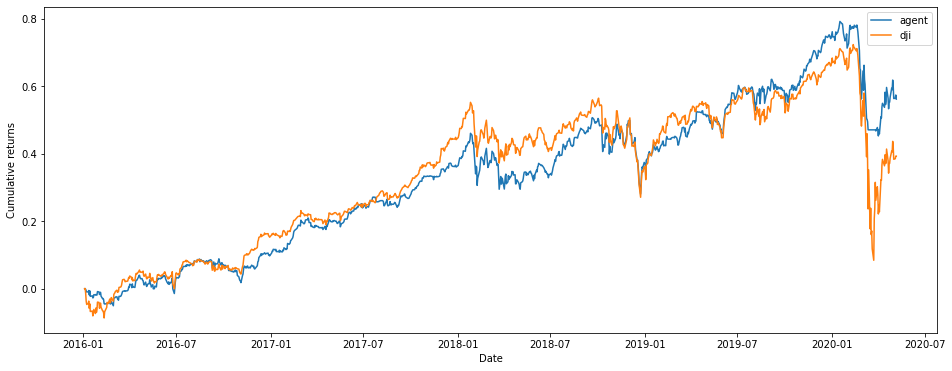

In [52]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets)
plt.plot(cum_rets_dji)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns plot agent vs dji.png', dpi=600)

In [45]:
# for e40

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


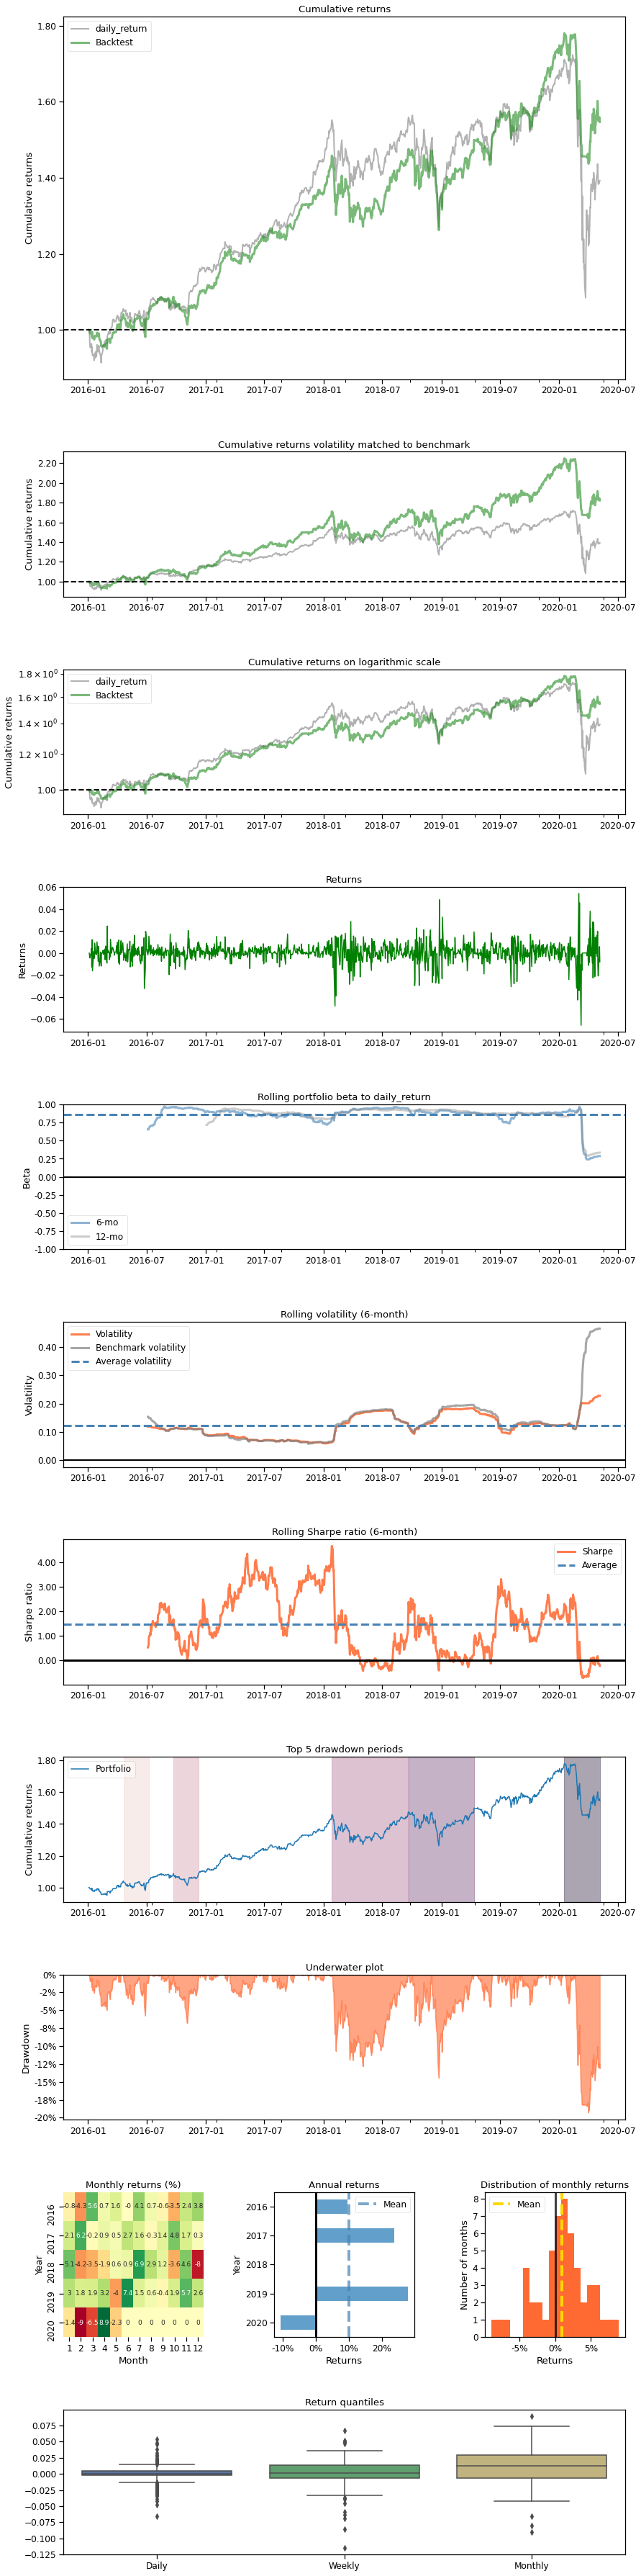

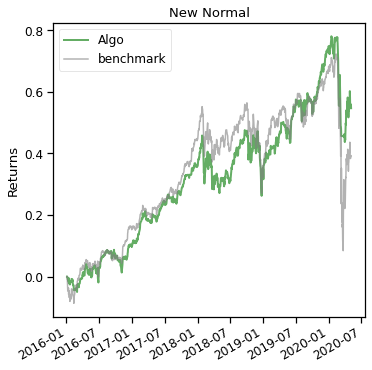

In [47]:
ac_value_agent_ = 'account_value_test_episode_40.csv'
df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_agent_), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

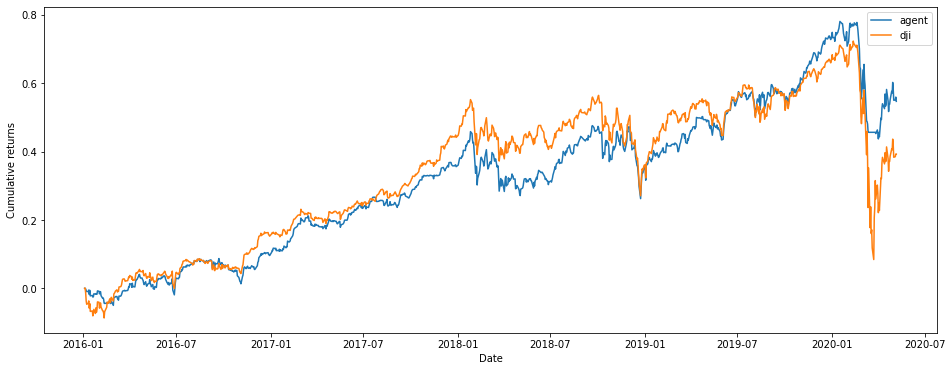

In [48]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.show()

In [7]:
#wandb run name: dauntless dust
results_dir = '../results_lr_schedule_step_10_grad_clip_small_nw_400_400_2016_2022_may'

In [9]:
ac_value_csv_last_ep = 'account_value_test_episode_70.csv'

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


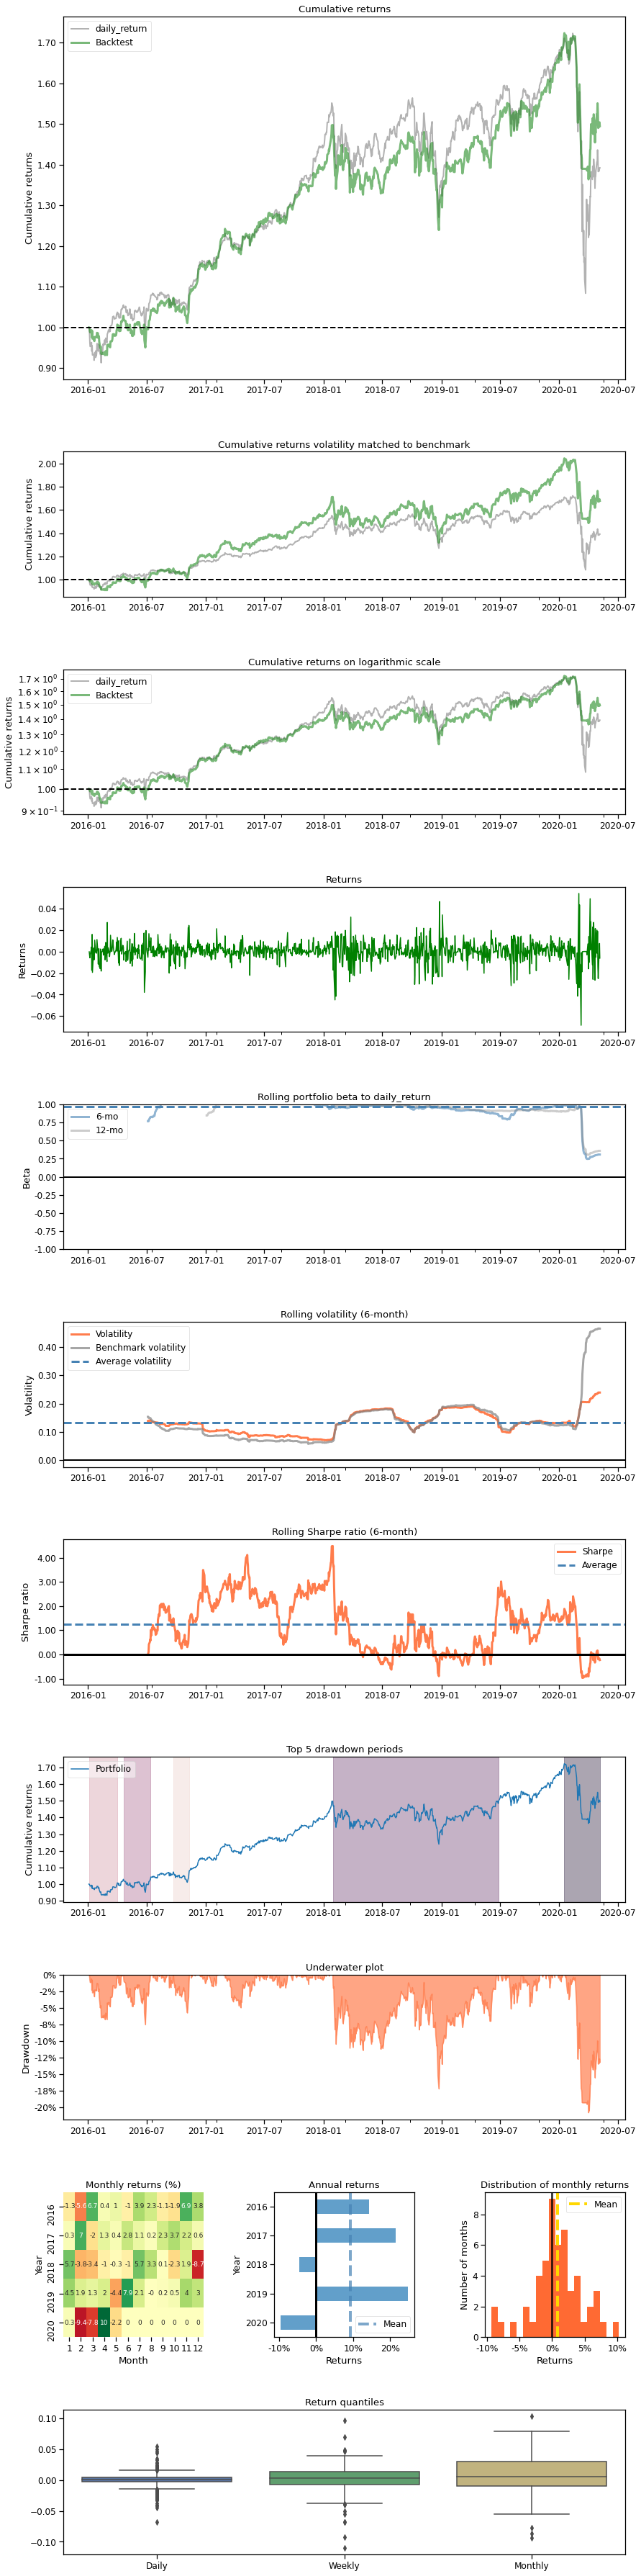

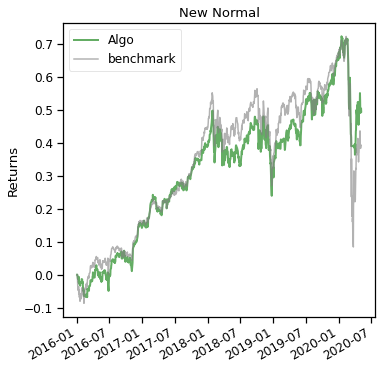

In [10]:
df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

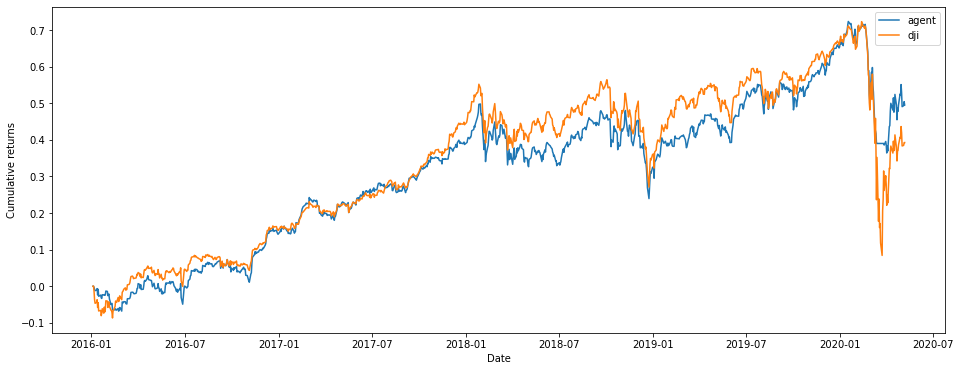

In [16]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns after nw convergence [dauntless dust] plot agent vs dji.png', dpi=600)

In [7]:
#wandb run name: avid wave
results_dir = '../results_with_noise_reset_every_episode'

In [9]:
ac_value_csv_last_ep = 'account_value_test_episode_40.csv'

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1092, 8)


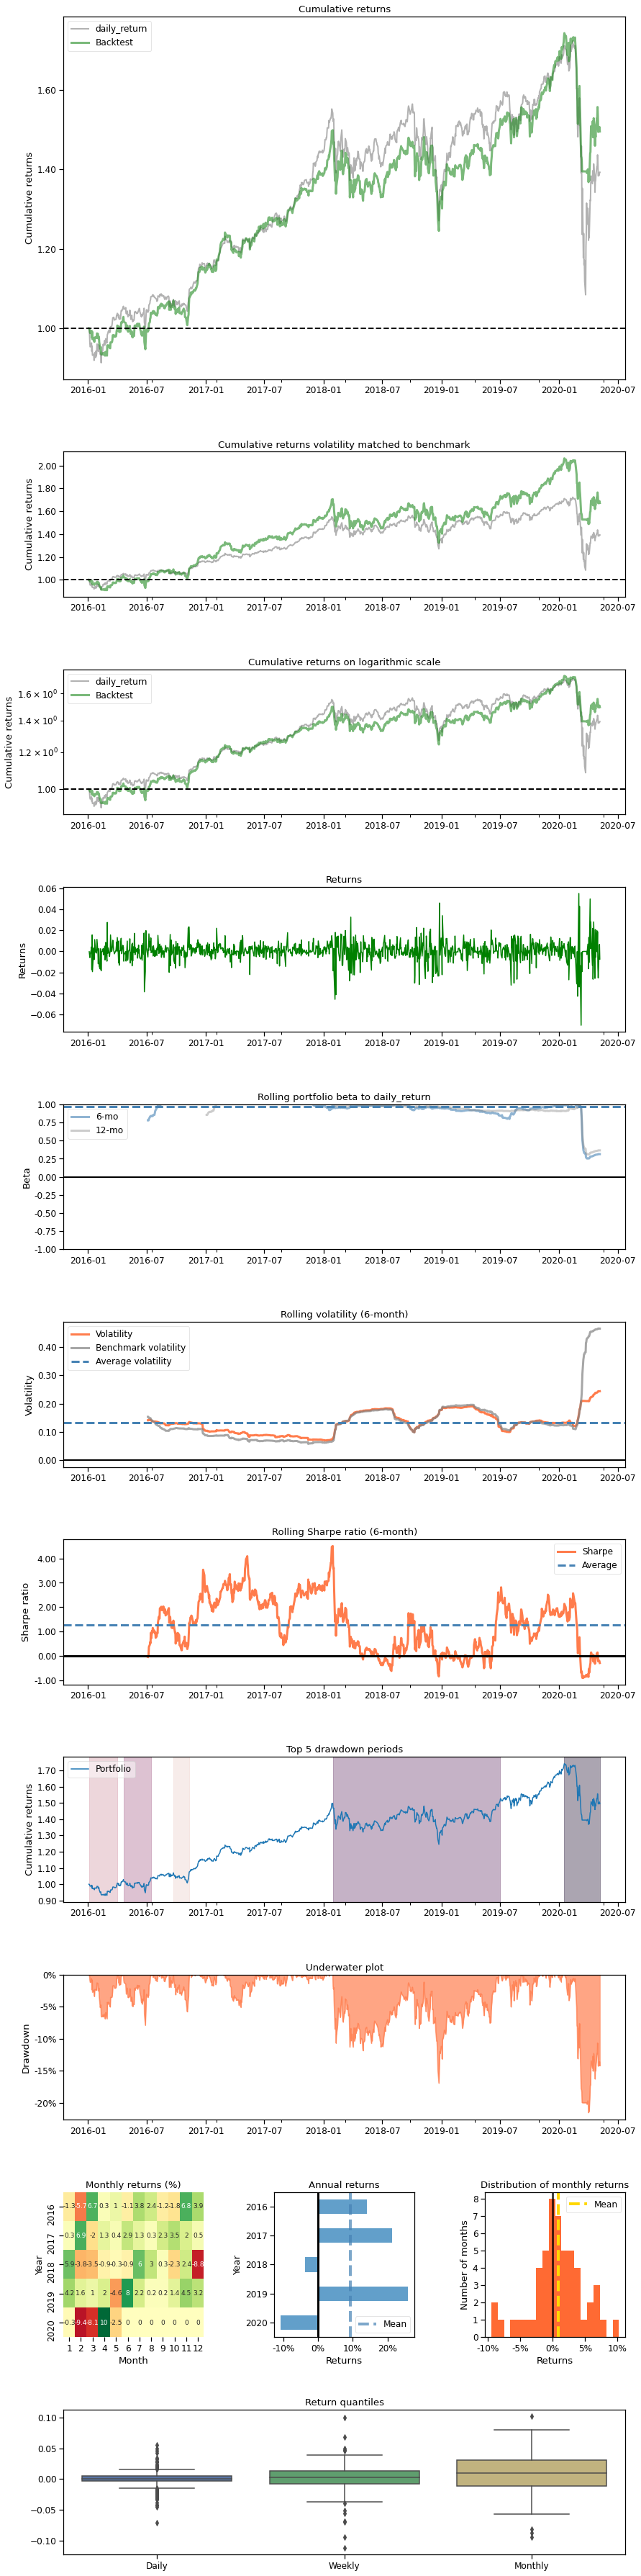

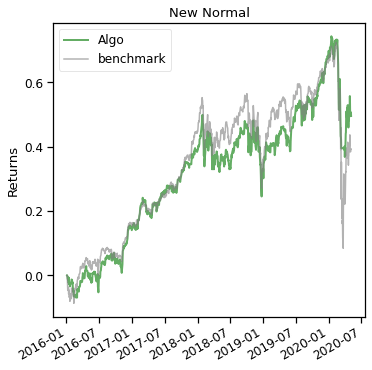

In [10]:
df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

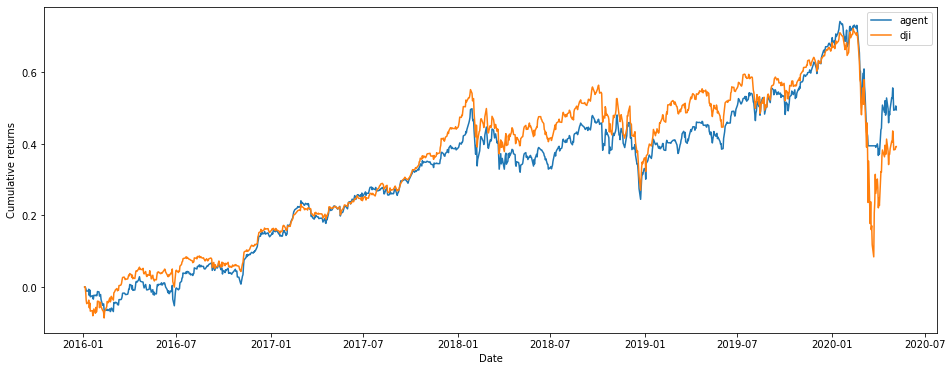

In [11]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns after nw convergence [avid wave] plot agent vs dji.png', dpi=600)

## Using tuned hyperparams on DDPG agent

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1094, 8)


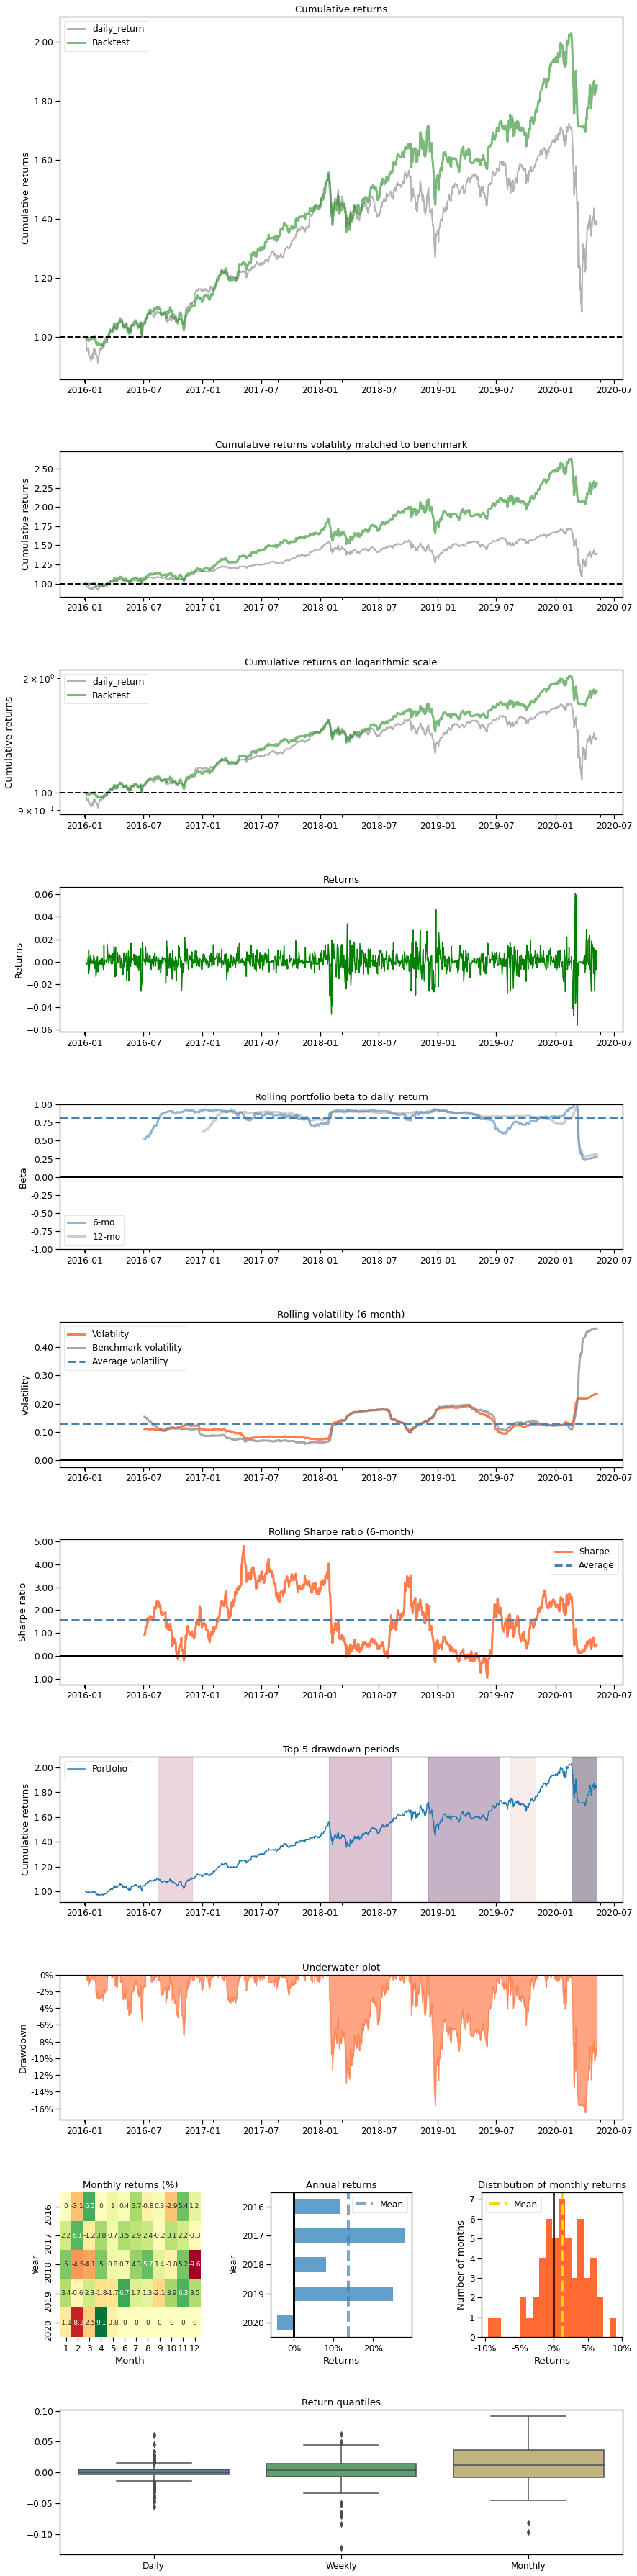

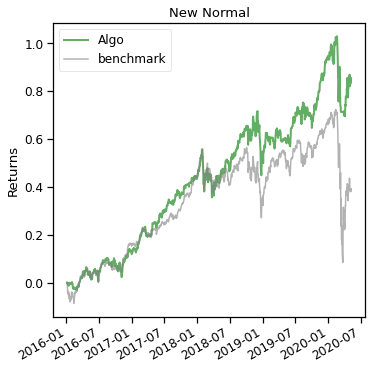

In [6]:
'''
config: 

'buffer_size': 100000, 
'learning_rate': 0.04984525010608113, 
'batch_size': 128, 
'net_arch': 'small' [64, 64]
'''
results_dir = '../tuning'
ac_value_csv_last_ep = 'account_value_test_tuning.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.loc[0,'date'],
                                                 baseline_end = df_account_value_.loc[len(df_account_value_)-1,'date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

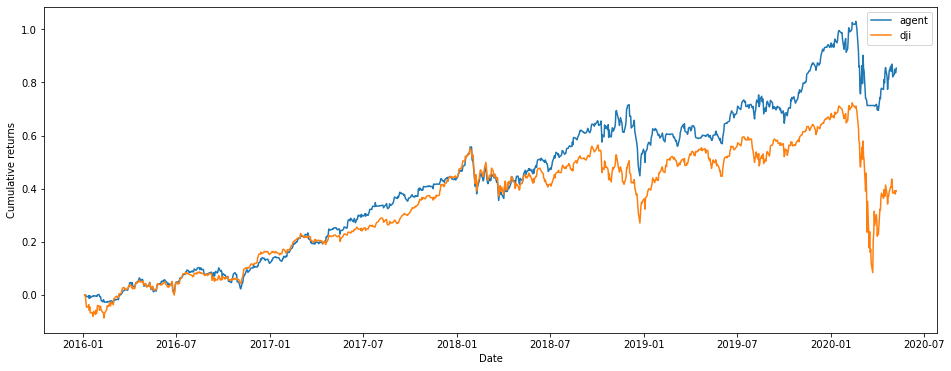

In [7]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent.png', dpi=600)

In [5]:
# linux machine

In [17]:
! pip install pyfolio

In [5]:
#wandb run name: earthy dragon
results_dir = '../results/tuned_lr_0.049/'
ac_value_csv_last_ep = 'account_value_test_episode_19.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


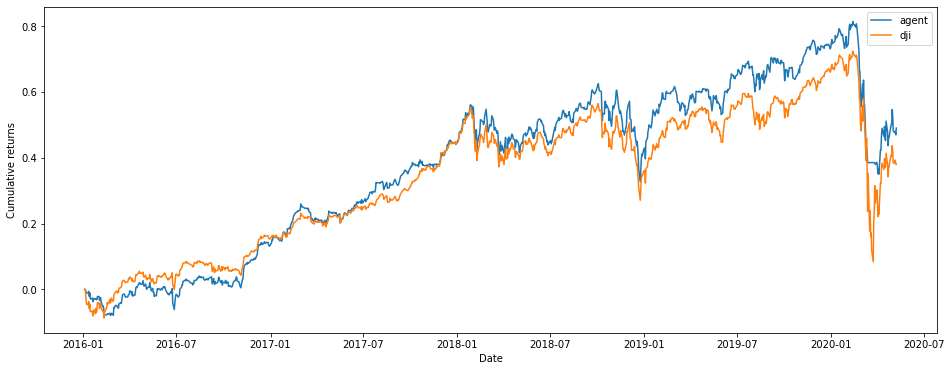

In [6]:
plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux.png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


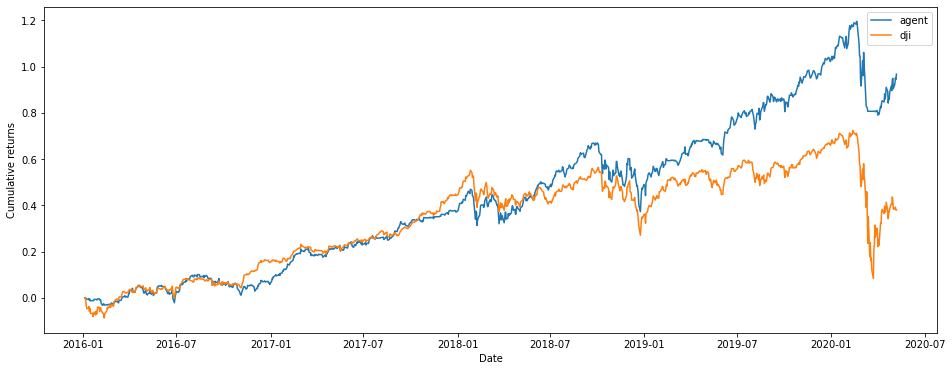

In [9]:
#wandb run name: laced-plasma
results_dir = '../results/tuned_lr_0.049_seed_12321/'
ac_value_csv_last_ep = 'account_value_test_episode_19.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux new seed.png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


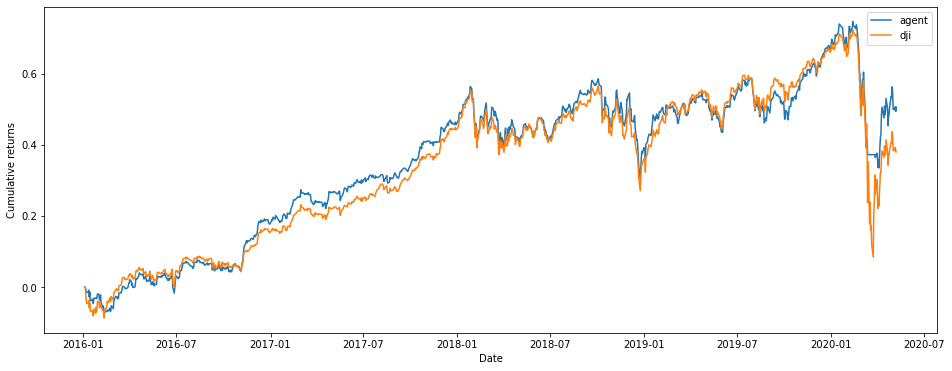

In [8]:
#wandb run name: 
results_dir = '../results/tuned_lr_0.049_seed_12321_critic_lr_reduced/'
ac_value_csv_last_ep = 'account_value_test_episode_19.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux new seed lr reduced.png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


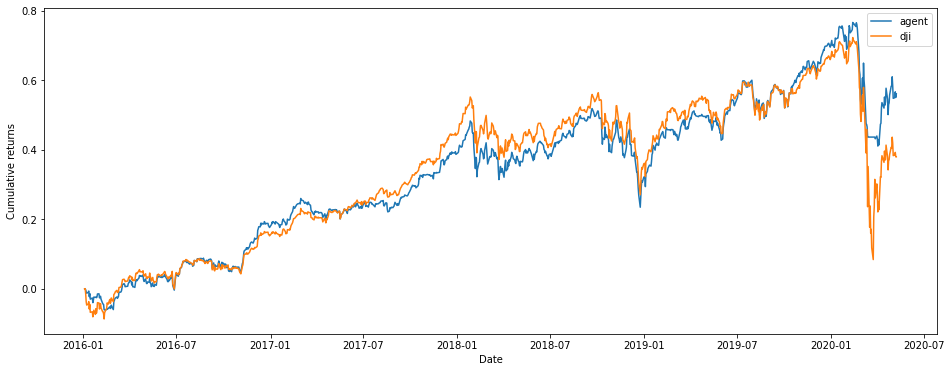

In [5]:
#wandb run name: 
results_dir = '../results/tuned_lr_0.049_seed_329_critic_lr_reduced/'
ac_value_csv_last_ep = 'account_value_test_episode_19.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux new lr reduced 10\.8.png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


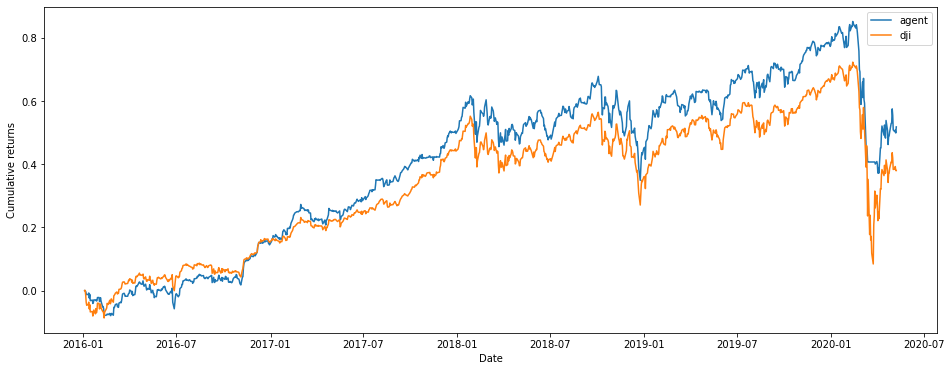

In [6]:
#wandb run name: fearless dew
# replicate 11.2 tuned seed 0 ep 20 final 10.1/51
results_dir = '../results/tuned_lr_0.049_seed_0_replicate_11.2'
ac_value_csv_last_ep = 'account_value_test_episode_19.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux seed 0 10\.1[fearess dew] replicate.png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


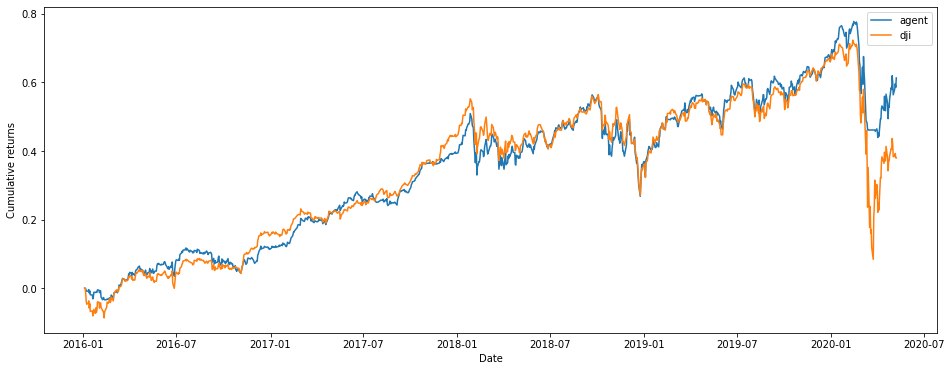

In [5]:
#wandb run name: cosmic shadow
# tuned seed 42 ep 100
results_dir = '../results/tuned_lr_0.049_seed_42/'
ac_value_csv_last_ep = 'account_value_test_episode_99.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux seed 42 11\.6[cosmic shadow].png', dpi=600)

In [9]:
# hyperparameter tuning lin

#wandb run name: cosmic shadow
# tuned seed 42 ep 100
results_dir = '../results/tuned_lr_0.049_seed_42/'
ac_value_csv_last_ep = 'account_value_test_episode_99.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux seed 42 11\.6[cosmic shadow].png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1090, 8)


Text(0, 0.5, 'Cumulative returns')

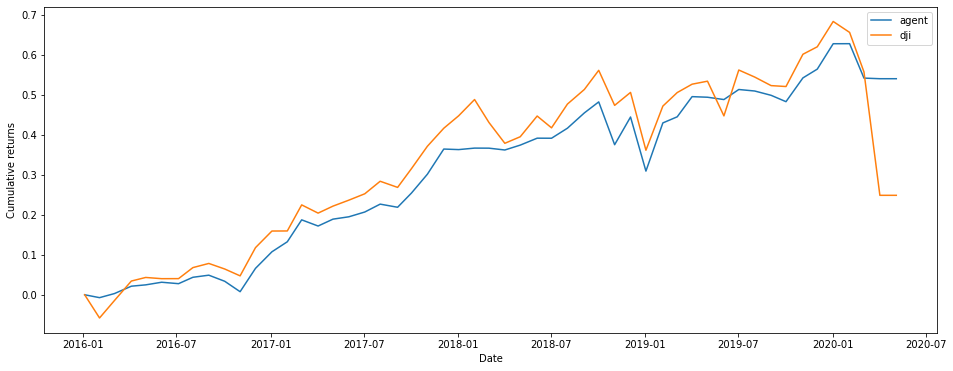

In [6]:
# monthly
#wandb run name: ruby oath
# tuned seed 0 ep 50
results_dir = '../results/monthly_data_seed_0/'
ac_value_csv_last_ep = 'account_value_test_episode_49.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_, baseline_returns_ = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_ = ep.cum_returns(test_returns_, 0.0)
cum_rets_dji_ = ep.cum_returns(baseline_returns_, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_)
plt.plot(cum_rets_dji_)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
# plt.savefig('Cumulative returns tuned agent linux seed 42 11\.6[cosmic shadow].png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1090, 8)


Text(0, 0.5, 'Cumulative returns')

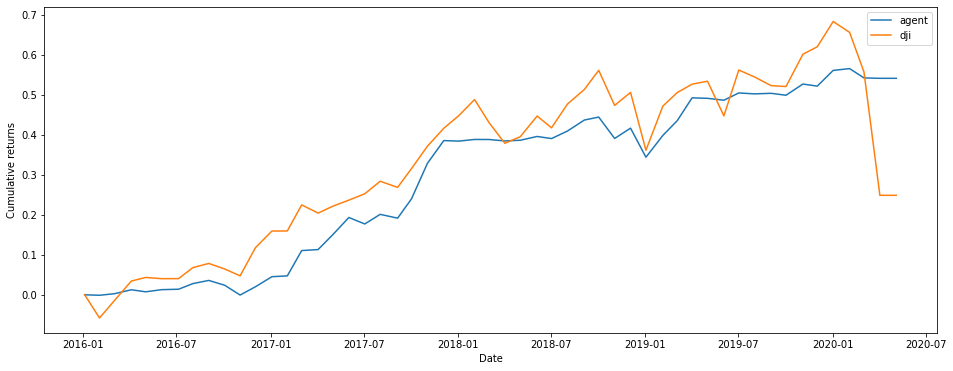

In [9]:
# tuning monthly seed 12321

results_dir = '../tuning_monthly/'
ac_value_csv_last_ep = 'account_value_test_tuning.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
# plt.savefig('Cumulative returns tuned agent linux seed 42 11\.6[cosmic shadow].png', dpi=600)

In [10]:
cum_rets_t[-1]

0.5420236156949589

In [11]:
cum_rets_dji_t[-1]

0.24867427001282505

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


Text(0, 0.5, 'Cumulative returns')

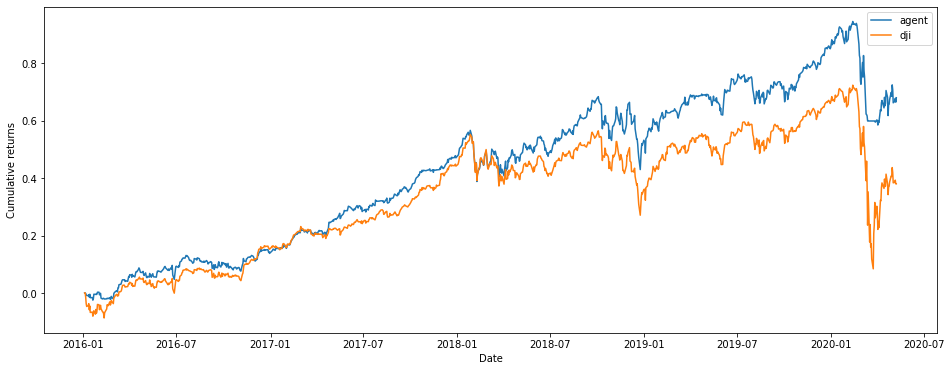

In [12]:
# tuning daily seed 0 optuna trial tuned model

results_dir = '../tuning/'
ac_value_csv_last_ep = 'account_value_test_tuning.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
# plt.savefig('Cumulative returns tuned agent linux seed 42 11\.6[cosmic shadow].png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


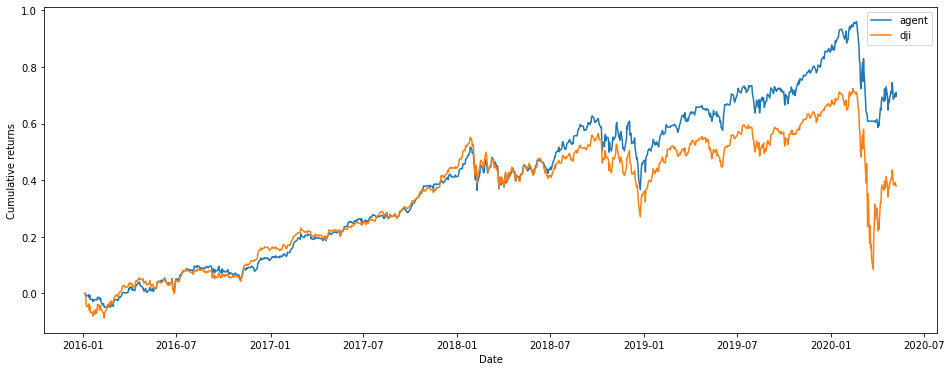

In [6]:
# tuning daily seed 0 codebase agent tuned model
# run: cool mountain
results_dir = '../results/daily_data_lin_tuned_seed_0'
ac_value_csv_last_ep = 'account_value_test_episode_49.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.savefig('Cumulative returns tuned agent linux seed 0 13\.1[cosmic shadow].png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1093, 8)


Text(0, 0.5, 'Cumulative returns')

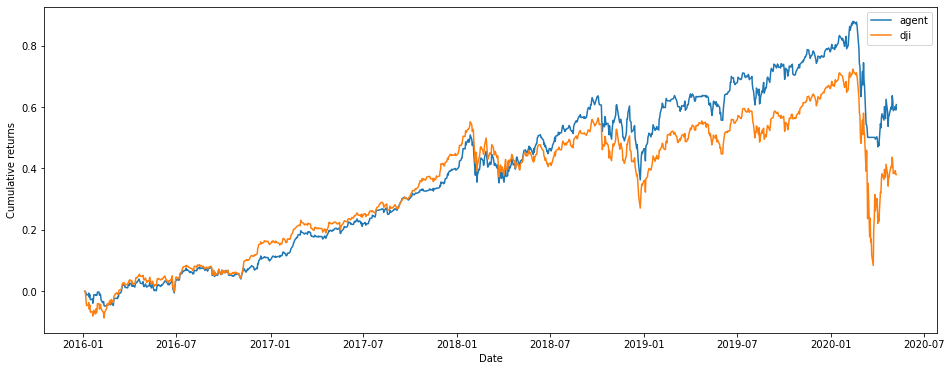

In [5]:
# tuning daily seed 12321 codebase agent tuned model (was tuned on seed 0)
# run: peach aardvark
results_dir = '../results/daily_data_lin_tuned_seed_12321_diff_seed_than_tuning'
ac_value_csv_last_ep = 'account_value_test_episode_19.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')
# plt.savefig('Cumulative returns tuned agent linux seed 0 13\.1[cosmic shadow].png', dpi=600)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1090, 8)


Text(0, 0.5, 'Cumulative returns')

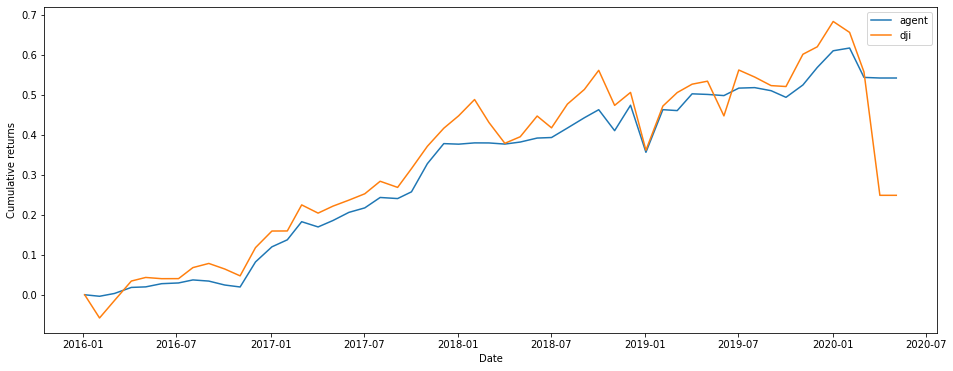

In [9]:
 # tuning monthly seed 333 optuna
# best params 
'''
alpha= 0.0031060995478059458, beta=0.0031060995478059458, ckp_dir='', input_dims=state_space, tau=0.001,
batch_size=8, layer1_size=512, layer2_size=512, max_size=1000000
'''

results_dir = '../tuning_monthly/'
ac_value_csv_last_ep = 'account_value_test_tuning.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1090, 8)


Text(0, 0.5, 'Cumulative returns')

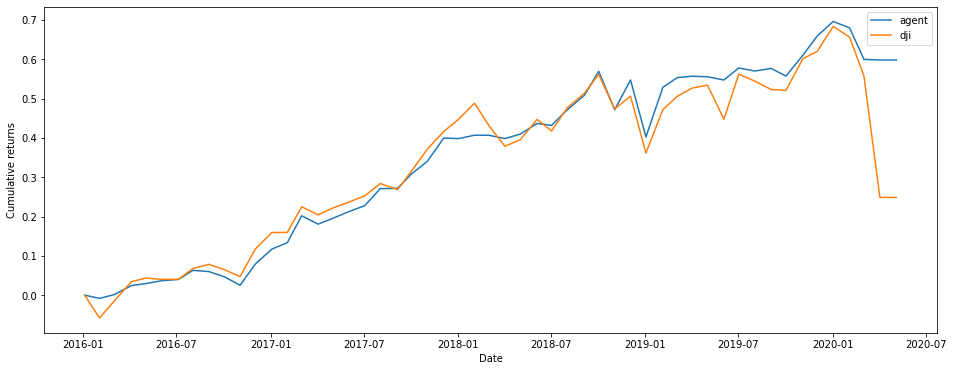

In [5]:
# tuning monthly seed 333 codebase
# wandb run: silvery forest


results_dir = '../results/monthly_data_seed_333/'
ac_value_csv_last_ep = 'account_value_test_episode_49.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1636, 8)


Text(0, 0.5, 'Cumulative returns')

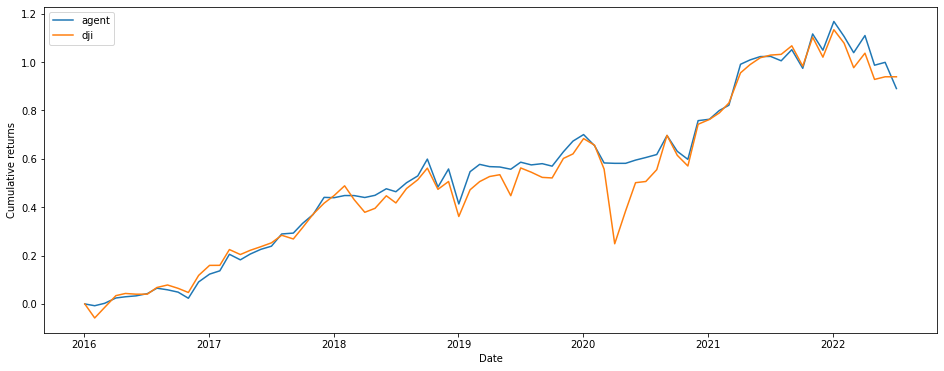

In [11]:
# tuning monthly seed 333 codebase ep 200 until 2022 july
# wandb run: elated galaxy


results_dir = '../results/monthly_data_seed_333/'
ac_value_csv_last_ep = 'account_value_test_episode_199.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

In [12]:
print(cum_rets_t[-1])
print(cum_rets_dji_t[-1])

0.890188204583769
0.9387951856078927


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1090, 8)


Text(0, 0.5, 'Cumulative returns')

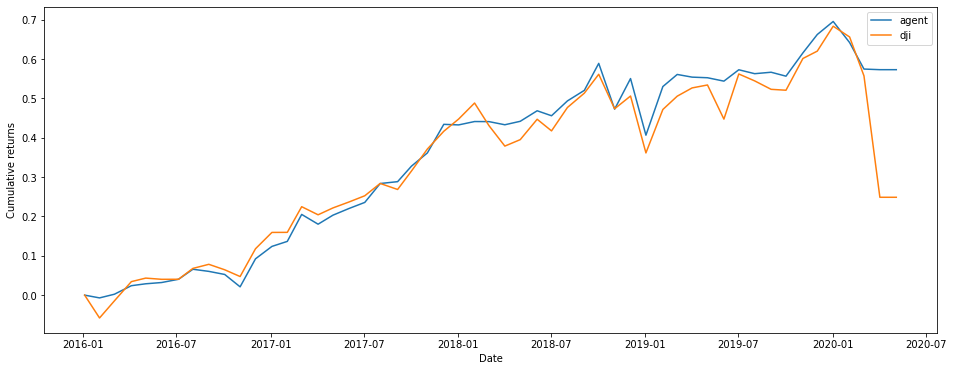

In [13]:
# tuning monthly seed 333 codebase ep 200 until 2020 may
# wandb run: elated galaxy


results_dir = '../results/monthly_data_seed_333/'
ac_value_csv_last_ep = 'account_value_test_episode_199_22.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

In [14]:
print(cum_rets_t[-1])
print(cum_rets_dji_t[-1])

0.572932806480047
0.24867427001282505


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1090, 8)


Text(0, 0.5, 'Cumulative returns')

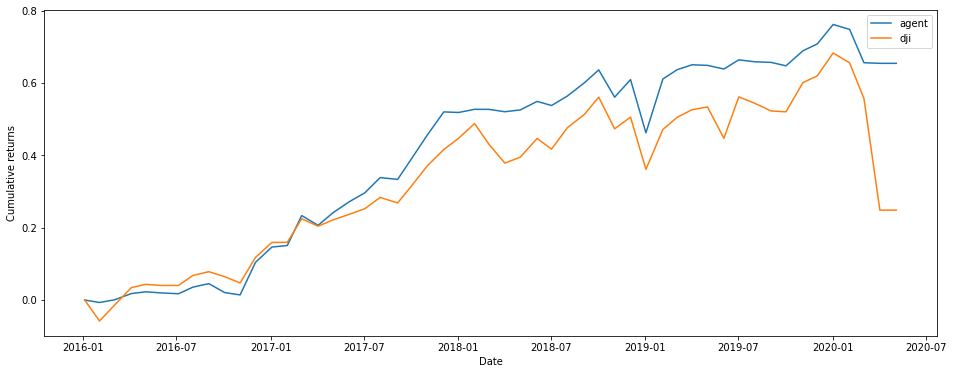

In [17]:
# tuning monthly seed 9923 codebase ep 200 until 2020 may
# wandb run: silver butterfly


results_dir = '../results/monthly_data_seed_9923/'
ac_value_csv_last_ep = 'account_value_test_episode_199_22.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

In [18]:
print(cum_rets_t[-1])
print(cum_rets_dji_t[-1])

0.6548068518509749
0.24867427001282505


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1636, 8)


Text(0, 0.5, 'Cumulative returns')

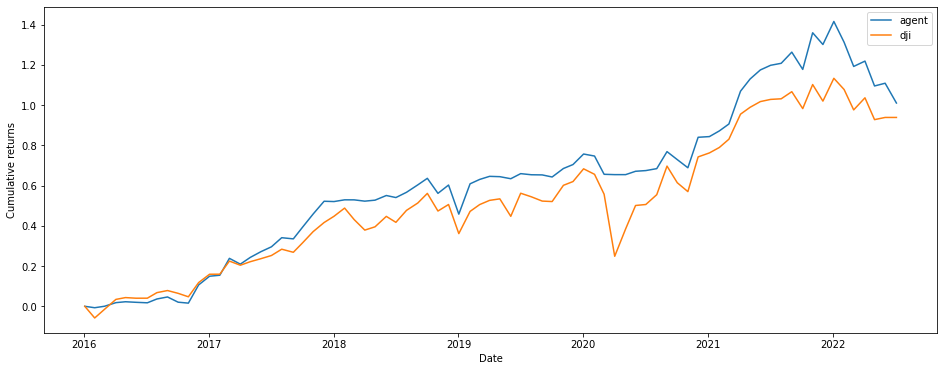

In [19]:
# tuning monthly seed 9923 codebase ep 200 until 2020 may
# wandb run: silver butterfly


results_dir = '../results/monthly_data_seed_9923/'
ac_value_csv_last_ep = 'account_value_test_episode_199.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

In [20]:
print(cum_rets_t[-1])
print(cum_rets_dji_t[-1])

1.0104822458526561
0.9387951856078927


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1636, 8)


Text(0, 0.5, 'Cumulative returns')

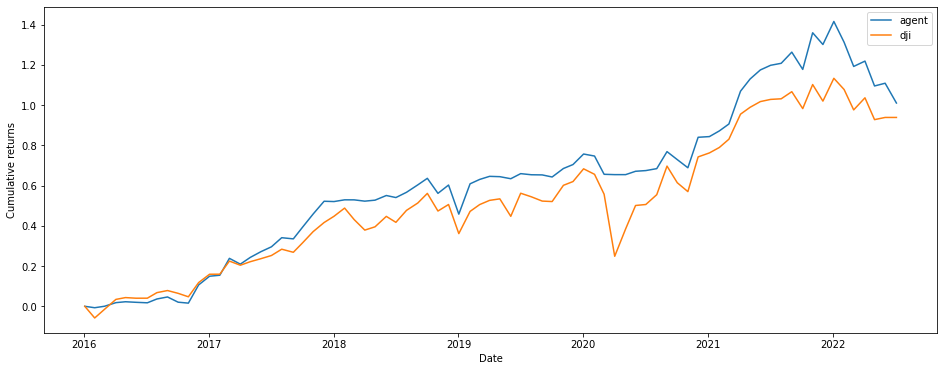

In [21]:
# tuning monthly seed 9923 codebase ep 200 run 2
# wandb run: golden universe


results_dir = '../results/monthly_data_seed_9923_run_2/'
ac_value_csv_last_ep = 'account_value_test_episode_199.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

In [22]:
print(cum_rets_t[-1])
print(cum_rets_dji_t[-1])

1.0104822458526561
0.9387951856078927


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1090, 8)


Text(0, 0.5, 'Cumulative returns')

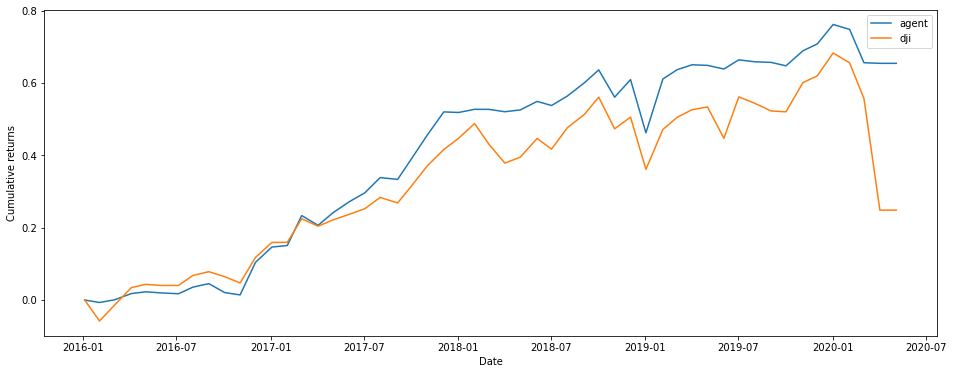

In [23]:
# tuning monthly seed 9923 codebase ep 200 run 2
# wandb run: golden universe


results_dir = '../results/monthly_data_seed_9923_run_2/'
ac_value_csv_last_ep = 'account_value_test_episode_199_22.csv'

df_account_value_ = pd.read_csv(os.path.join(results_dir, ac_value_csv_last_ep), index_col='Unnamed: 0')
# df_account_value_['date'] = pd.to_datetime(df_account_value_['date'], format='%Y-%m-%d')

test_returns_t, baseline_returns_t = backtest_plot(df_account_value_, 
                                                 baseline_ticker = '^DJI', 
                                                 baseline_start = df_account_value_.iloc[0]['date'],
                                                 baseline_end = df_account_value_.iloc[-1]['date'])


cum_rets_t = ep.cum_returns(test_returns_t, 0.0)
cum_rets_dji_t = ep.cum_returns(baseline_returns_t, 0.0)

plt.figure(figsize=(16,6))
plt.plot(cum_rets_t)
plt.plot(cum_rets_dji_t)
plt.legend(['agent', 'dji'])

plt.xlabel('Date')
plt.ylabel('Cumulative returns')

In [24]:
print(cum_rets_t[-1])
print(cum_rets_dji_t[-1])

0.6548068518509749
0.24867427001282505
